### POSTTEST 6

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

### Read Data

In [2]:
data = pd.read_csv("gamesBersih.csv")

In [3]:
data.head()

,Unnamed: 0,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,black,draw,white
0,0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0.0,0.0,1.0
1,1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1.0,0.0,0.0
2,2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0.0,0.0,1.0
3,3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0.0,0.0,1.0
4,4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0.0,0.0,1.0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19629 entries, 0 to 19628
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      19629 non-null  int64  
 1   id              19629 non-null  object 
 2   rated           19629 non-null  bool   
 3   created_at      19629 non-null  float64
 4   last_move_at    19629 non-null  float64
 5   turns           19629 non-null  int64  
 6   victory_status  19629 non-null  object 
 7   winner          19629 non-null  object 
 8   increment_code  19629 non-null  object 
 9   white_id        19629 non-null  object 
 10  white_rating    19629 non-null  int64  
 11  black_id        19629 non-null  object 
 12  black_rating    19629 non-null  int64  
 13  moves           19629 non-null  object 
 14  opening_eco     19629 non-null  object 
 15  opening_name    19629 non-null  object 
 16  opening_ply     19629 non-null  int64  
 17  black           19219 non-null 

### Data Split

In [9]:
X = data[['white_rating','black_rating']]
y = data[['winner']]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Data Normalisasi

In [11]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

### Algoritma KNN

In [12]:
modelKnn = KNeighborsClassifier()
modelKnn.fit(X_train_std,y_train)

knn_pred = modelKnn.predict(X_test_std)
akurasi_KNN = accuracy_score(y_test, knn_pred)
print("Akurasi algoritma KNN :", round(akurasi_KNN,2))


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Akurasi algoritma KNN : 0.58


### Algoritma Naive Bayes

In [14]:
gaussnb  = GaussianNB()
gaussnb.fit(X_train_std,y_train)

gaussnb_pred = gaussnb.predict(X_test_std)
akurasi_gnb = accuracy_score(y_test, gaussnb_pred)
print("Akurasi algoritma Naive Bayes :", round(akurasi_gnb,2))

Akurasi algoritma Naive Bayes : 0.6


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Algoritma SVM

In [23]:
svm = SVC()
svm.fit(X_train_std,y_train)

svm_pred = svm.predict(X_test_std)
akurasi_svm = accuracy_score(y_test, svm_pred)
print("Akurasi algoritma SVC :", round(akurasi_svm,2))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi algoritma SVC : 0.61


### Perbandingan Akurasi Setiap Algoritma

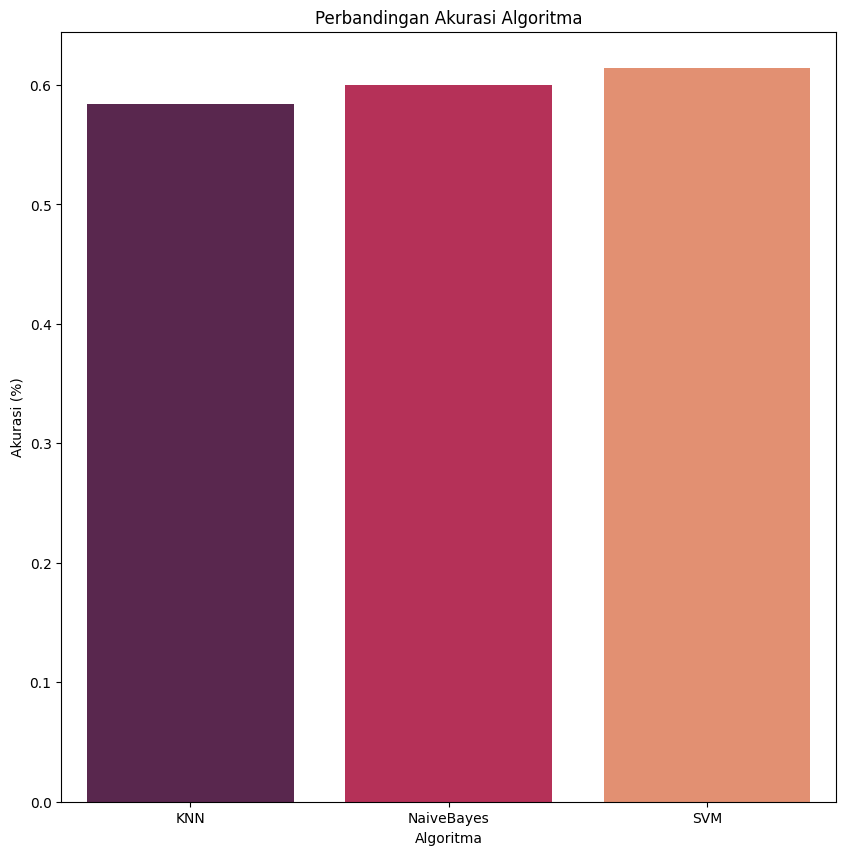

In [24]:
algoritma = ["KNN","NaiveBayes","SVM"]
akurasi = [akurasi_KNN,akurasi_gnb,akurasi_svm]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='rocket')

plt.title("Perbandingan Akurasi Algoritma")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

### Confusion Matrix

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion matrix : 

 [[1627   25 1023]
 [ 151    5  122]
 [1102   27 1807]]


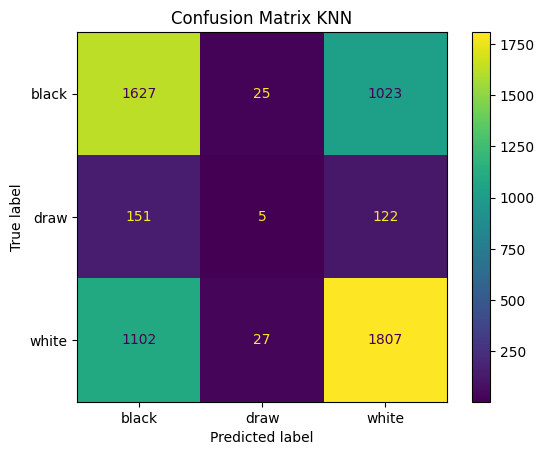

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_pred)
print('Confusion matrix : \n\n', cm)

displays = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
displays.plot()

plt.title("Confusion Matrix KNN")
plt.grid(False)

### Hyperparameter Tuning (KNN)

In [17]:
modelKNN = KNeighborsClassifier()

param_grid = { "n_neighbors" :[i for i in range(0,5)]}

gsv = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gsv.fit(X_train, y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\skl

In [18]:
print(gs.best_params_)

{'n_neighbors': 3}


In [19]:
print("Akurasi Training Set : ",round(gs.score(X_train,y_train)*100,1),"%")

Akurasi Training Set :  75.8 %


In [26]:
data.to_csv("gamesSupervised.csv")